In [1057]:
# Using scarches kernel
import sys
sys.path.append("../../function/")
import trajDiff_v92
milo2=trajDiff_v92.Milo2()
import scanpy as sc
import numpy as np
import pandas as pd
import PyComplexHeatmap
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

In [1032]:
def split_umap(adata, split_by, ncol=2, nrow=None, **kwargs):
    categories = adata.obs[split_by].cat.categories
    if nrow is None:
        nrow = int(np.ceil(len(categories) / ncol))
    fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))
    axs = axs.flatten()
    for i, cat in enumerate(categories):
        ax = axs[i]
        sc.pl.draw_graph(adata[adata.obs[split_by] == cat], ax=ax, show=False, title=cat, **kwargs)
    plt.tight_layout()

In [290]:
from sklearn.cluster import KMeans

In [1026]:
pseudobulk.obs

,Sample,Stage,light_pred,Tissue.Specific.,nhoods_index
Index,,,,,
Ablation_Matsushita_abl7con1_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2,Ablation_Matsushita_abl7con1,Steady,0.037578,DiaphysisandEpiphysis,Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-...
Ablation_Matsushita_abl7con2_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2,Ablation_Matsushita_abl7con2,Steady,0.057092,DiaphysisandEpiphysis,Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-...
Ablation_Matsushita_cxcl1_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2,Ablation_Matsushita_cxcl1,Development,0.048295,DiaphysisandEpiphysis,Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-...
Ablation_Matsushita_cxcl2_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2,Ablation_Matsushita_cxcl2,Development,0.034968,DiaphysisandEpiphysis,Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-...
BmscChondro_Long_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2,BmscChondro_Long,Steady,0.039443,Stroma,Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-...
...,...,...,...,...,...
Metaphysis_Yang_sorted_sep_TTTATGCGTCATATGC-1_5-1-2,Metaphysis_Yang_sorted,Development,0.871712,DiaphysisandEpiphysis,TTTATGCGTCATATGC-1_5-1-2
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_TTTATGCGTCATATGC-1_5-1-2,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21,Development,0.823301,DiaphysisandEpiphysis,TTTATGCGTCATATGC-1_5-1-2
Septoclasts_Kishor_Longbone1_sep_TTTATGCGTCATATGC-1_5-1-2,Septoclasts_Kishor_Longbone1,Development,0.870533,DiaphysisandEpiphysis,TTTATGCGTCATATGC-1_5-1-2


In [2]:
dpt=sc.read("../../important_processed_data/11.16_dpt.h5ad")

In [3]:
timeDf=pd.read_csv("../../important_processed_data/11.19_lightGBM_pred_and_orig.csv",index_col=0)

In [5]:
dpt.obs["light_pred"]=timeDf["light_pred"]

In [7]:
adata=dpt[dpt.obs["lineage_lepr"]]

In [8]:
adata.obs["Stage"][(adata.obs["Age"]=="Young Adult") & (adata.obs["Stage"]=="Steady")] = "Development"

In [10]:
del adata.var
adata.X=adata.layers["counts"]
del adata.obsm["X_diffmap"]

In [234]:
mdata = milo2.load(adata)

In [84]:
sc.pp.neighbors(mdata['rna'], use_rep='X_scANVI', n_neighbors=300, n_pcs=15)

In [221]:
adata=adata[adata.obs["Stage"]!="Injury(Regeneration)"]

In [224]:

array_of_strings =  np.array([str(s).replace(' ', '') for s in adata.obs["Tissue.Specific."].values])
adata.obs["Tissue.Specific."]=array_of_strings

/tmp/ipykernel_225436/3184761280.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["Tissue.Specific."]=array_of_strings


In [232]:
adata.obs["Tissue.Specific."][adata.obs["Tissue.Specific."]=="Diaphysis"]="DiaphysisandEpiphysis"
adata.obs["Tissue.Specific."][adata.obs["Tissue.Specific."]=="LimbBud"]="DiaphysisandEpiphysis"
adata.obs["Tissue.Specific."][adata.obs["Tissue.Specific."]=="Diaphysis"]="DiaphysisandEpiphysis"
adata.obs["Tissue.Specific."][adata.obs["Tissue.Specific."]=="Bone"]="DiaphysisandEpiphysis"
adata.obs["Tissue.Specific."][adata.obs["Tissue.Specific."]=="Metaphysis"]="DiaphysisandEpiphysis"
adata.obs["Tissue.Specific."][adata.obs["Tissue.Specific."]=="Epiphysis"]="DiaphysisandEpiphysis"

/tmp/ipykernel_225436/2053367762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["Tissue.Specific."][adata.obs["Tissue.Specific."]=="Diaphysis"]="DiaphysisandEpiphysis"
/tmp/ipykernel_225436/2053367762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["Tissue.Specific."][adata.obs["Tissue.Specific."]=="LimbBud"]="DiaphysisandEpiphysis"
/tmp/ipykernel_225436/2053367762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [235]:
milo2.make_nhoods(mdata['rna'], prop=0.015)
mdata = milo2.count_nhoods(adata, sample_col="Sample")
pseudobulk=milo2.make_pseudobulk_parallel(mdata=mdata,sample_col="Sample",group_col="Stage",time_col="light_pred",other_col=["Tissue.Specific."],njob=25,min_cell=2)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100%|██████████| 860/860 [08:46<00:00,  1.63it/s]


In [257]:
deg=milo2.da_expression(mdata,design="~Stage+Tissue.Specific.",model_contrasts="StageDevelopment-StageSteady",njob=35,fix_libsize=False)

Using edgeR to find DEG......




  0%|          | 0/860 [00:00<?, ?it/s]


  4%|▍         | 35/860 [00:40<15:47,  1.15s/it]Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable 

In [417]:
cpm_df=milo2.make_cpm(mdata=mdata,design="~Stage+Tissue.Specific.",model_contrasts="StageDevelopment-StageSteady",fix_libsize=False,njob=25)

Using edgeR to find CPM......

  4%|▎         | 32/860 [02:27<28:11,  2.04s/it]   Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/u

In [425]:
colName=cpm_df.columns
attr1=[s.split("_sep_")[0] for s in colName]
attr2=[s.split("_sep_")[1] for s in colName]
var1=np.unique(attr1)[0]
logic1=[s==var1 for s in attr1]
group1=cpm_df.iloc[:,logic1]
var2=np.unique(attr1)[1]
logic2=[s==var2 for s in attr1]
group2=cpm_df.iloc[:,logic2]


In [428]:
milo=mdata["milo"]

In [431]:
from itertools import compress
pseudobulk.varm[var1]=group1
pseudobulk.varm[var2]=group2

indexCell = list(compress(attr2, logic2))
pseudobulk.varm[var1].columns=indexCell
pseudobulk.varm[var2].columns=indexCell
pseudobulk.uns["var1"]=var1
pseudobulk.uns["var2"]=var2
varDf=pd.DataFrame(index=milo.var_names)
milo.varm[var1]=milo2.mergeVar(varDf,group1.T)
milo.varm[var2]=milo2.mergeVar(varDf,group2.T)

In [433]:
milo2.permute_point_cpm(mdata)

In [434]:
PyComplexHeatmap.heatmap(np.log(pseudobulk.varm["group1_cpm"]),vmax=20,vmin=15,cmap="RdBu_r")

MuData object with n_obs × n_vars = 65263 × 18172
  3 modalities
    rna:	65217 x 17312
      obs:	'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 'leiden_clusters_level_5', 'leiden_clusters_level_6', 'leiden_clusters_level_7', 'K2', 'K7', 'K19', 'K36', 'K66', 'K112', 'K220', 'C2', 'C7', 'C19', 'C36', 'C49', 'C90', 'C137', 'C2_named', 'C7_named', 'C19_named', 'C36_named', 'C49_named', 'C90_named', 'C137_named', 'sample_coarse', 'lineage_string', 'dpt_pseudotime', 'start', 'palantir_pseudotime', 'palantir_entropy', 'palantir_norm', 'lineage_chondro', 'lineage_laFibro', 'lineage_lepr', 'lineage_mesenchyme', 'pred_dpt', 'light_pred', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      uns:	'C19_named_colors', 'C7_named_colors', 'DM_EigenValues', 'coarse_label_colors', 'diffmap_evals', 'draw_graph', 'hvg', 'iroot', 'lineage_laFibro_colors', 'lineage_string_colors', 'mix_level_2_colors', 'mix_level_2_sizes', 'neighbors', 'paga', 'palantir_waypoints', 'sample_coarse_sizes', 'umap', 'nhood_neighbors_key'
      obsm:	'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'X_draw_graph_fa', 'X_pca', 'X_scANVI', 'X_umap', 'palantir_fate_probabilities', 'nhoods'
      layers:	'counts'
      obsp:	'DM_Kernel', 'DM_Similarity', 'connectivities', 'distances'
    milo:	46 x 860
      var:	'index_cell', 'kth_distance', 'time', 'range_down', 'range_up'
      uns:	'sample_col'
      varm:	'Accept', 'logChange', 'null_mean', 'StageDevelopment', 'StageSteady'
    pseudobulk:	18529 x 17312
      obs:	'Sample', 'Stage', 'light_pred', 'Tissue.Specific.', 'nhoods_index'
      var:	'overall_gene_p'
      uns:	'sample_col', 'group_col', 'time_col', 'shuffle_times', 'sum', 'var1', 'var2'
      varm:	'PValue', 'logFC', 'logCPM', 'FDR', 'F', 'SPFDR', 'null_mean', 'nullPoint', 'truePoint', 'exprPoint', 'gene_p_adj', 'StageDevelopment', 'StageSteady', 'group1_cpm', 'group2_cpm'

In [258]:

deg=milo2.makeSPFDR(mdata=mdata,njob=-1)
null_test=milo2.makeShuffleDA(mdata,design="~Stage+Tissue.Specific.",model_contrasts="StageDevelopment-StageSteady",njob=30,times=2)
milo2.make_range_gene(mdata=mdata,FDR_threshold=0.05,time_col="light_pred")
test=milo2.test_whole_gene(mdata)
milo2.permute_point_gene(mdata)
milo2.test_gene_binom(mdata)

add spatial FDR......

100%|██████████| 17312/17312 [05:16<00:00, 54.68it/s]


working on 0 times

Using edgeR to find DEG......

  0%|          | 0/860 [00:00<?, ?it/s]R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings

Making FDR

add spatial FDR......

100%|██████████| 17312/17312 [05:13<00:00, 55.31it/s]


working on 1 times

Using edgeR to find DEG......

100%|██████████| 860/860 [07:54<00:00,  1.81it/s]


Making FDR

add spatial FDR......

100%|██████████| 17312/17312 [04:38<00:00, 62.11it/s]
../../function/trajDiff_v73.py:1200: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = pd.concat(filtered_dfs).groupby(level=0).mean()
R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 

R[write to console]: There were 50 or more warnings 

In [277]:
sigGene=pseudobulk.var_names[np.array(pseudobulk.var["overall_gene_p"]<0.05)]

In [282]:
sigGene=sigGene[0:2262]

In [302]:
exprMatrix=pseudobulk.varm["exprPoint"].loc[sigGene]

In [305]:
exprMatrix=exprMatrix.fillna(0)

In [303]:
exprMatrix

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
1110038B12Rik,13.679024,12.292865,12.104572,12.558888,13.398184,14.032698,14.894341,15.766920,16.762091,16.885619,...,16.817904,17.128348,15.729187,20.201960,23.182930,23.182930,24.673415,24.673415,24.673415,24.673415
1200007C13Rik,-1.640007,-2.366839,-2.418642,-2.915197,-2.795757,-3.485647,-3.946668,-4.260556,-3.473835,-3.400604,...,1.188339,1.394593,1.995559,1.282014,1.282014,1.282014,NaN,NaN,NaN,NaN
1500015A07Rik,5.450101,4.906213,5.451614,5.273688,4.964731,4.765457,4.565776,3.689852,4.244751,4.544530,...,-0.778914,-0.501923,0.495722,0.354767,5.291889,5.291889,7.760449,7.760449,7.760449,7.760449
1500015O10Rik,-1.154658,-3.214739,-4.778221,-5.303424,-5.740065,-5.965566,-5.864170,-5.758653,-6.099557,-6.422836,...,3.169189,3.546137,3.262692,4.180335,3.200189,3.200189,2.710115,2.710115,2.710115,2.710115
1600015I10Rik,-0.915633,-4.381601,-4.896292,-4.674029,-4.388882,-3.471996,-2.887762,-1.902723,-1.171887,-0.483430,...,0.668538,0.669669,0.619557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zfp995,-0.370995,-3.309862,-3.932575,-3.829475,-3.250489,-2.720937,-2.581475,-2.231469,-1.960818,-1.595032,...,-0.845347,-0.714593,-0.358406,0.540911,3.223705,3.223705,4.565102,4.565102,4.565102,4.565102
Zic3,2.922133,2.316896,1.530293,1.116445,0.634750,-0.415140,-0.827779,-1.691284,-2.076934,-2.578135,...,0.589840,0.549448,0.418256,1.238024,3.416102,3.416102,4.505142,4.505142,4.505142,4.505142
Zkscan6,4.757775,3.422265,2.461077,2.112901,1.880544,2.055245,1.870720,2.117295,2.617189,2.865223,...,2.312583,3.252885,3.978940,1.265694,1.691541,1.691541,1.904465,1.904465,1.904465,1.904465
Zswim9,-2.285663,-2.541297,-2.889887,-3.086203,-2.417265,-1.415407,-1.181608,-0.537204,-0.758121,-0.831489,...,-0.578893,-0.354166,-1.451400,-3.385645,1.914853,1.914853,4.565102,4.565102,4.565102,4.565102


In [306]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(exprMatrix)
labels = kmeans.labels_
labels=pd.DataFrame(labels)
labels.index=exprMatrix.index

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa1190b3f70>
Traceback (most recent call last):
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
   

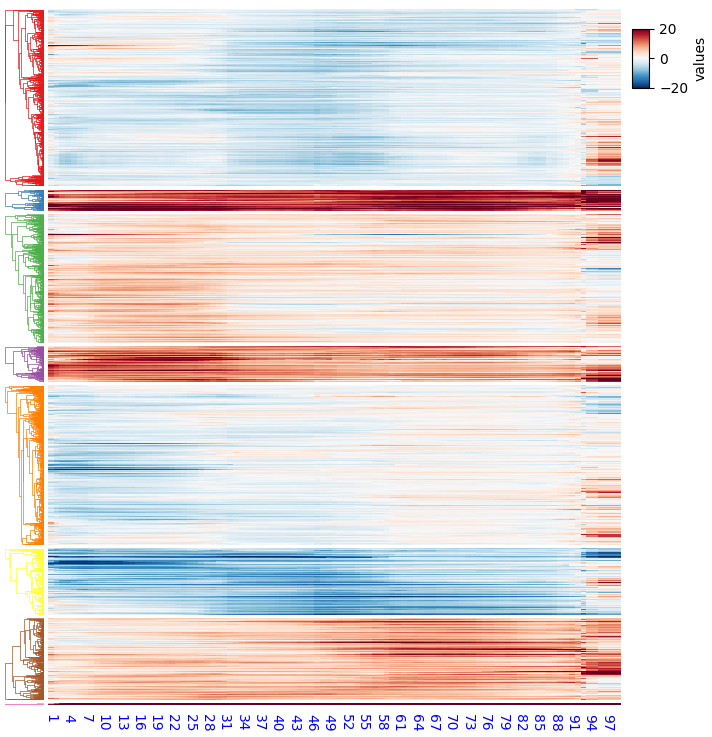

In [307]:
plt.figure(figsize=(8, 8))
cm = PyComplexHeatmap.ClusterMapPlotter(data=exprMatrix,
                       col_cluster=False,row_cluster=True,row_split=labels,
                       row_split_gap=0.8,
                       label='values',row_dendrogram=True,
                       show_rownames=False,show_colnames=True,
                       tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                       cmap='RdBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'},vmax=20,vmin=-20)

<AxesSubplot: >

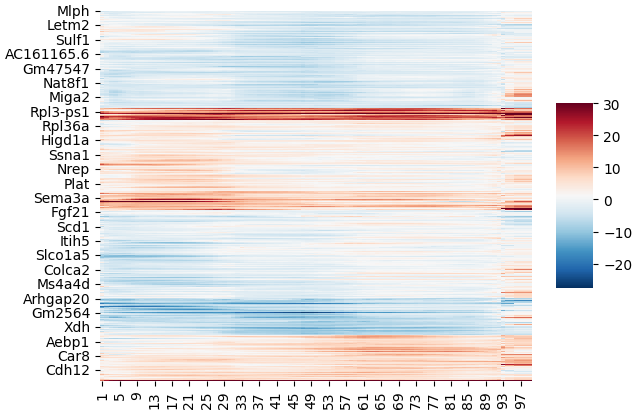

In [328]:
PyComplexHeatmap.heatmap(exprMatrix.loc[np.concatenate(cm.row_order),:],vmax=30,cmap="RdBu_r")

In [340]:
milo2.permute_point_gene(mdata)
milo2.test_gene_binom(mdata)

In [407]:
fdr_matrix=pseudobulk.varm["gene_p_adj"].loc[sigGene]

In [408]:
fdr_matrix=-np.log(fdr_matrix+0.000000001)

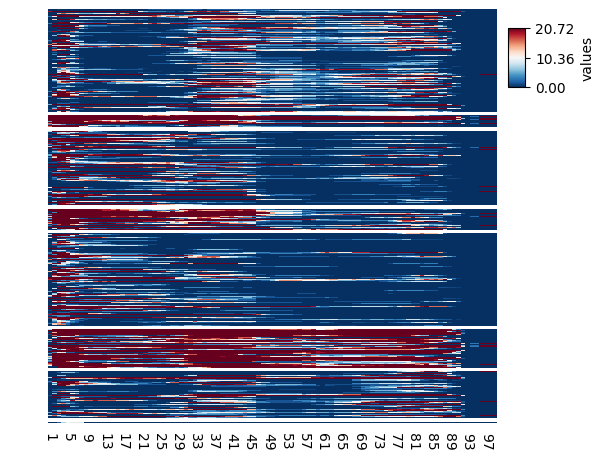

In [411]:
PyComplexHeatmap.ClusterMapPlotter(fdr_matrix.loc[np.concatenate(cm.row_order),:],
                                   col_cluster=False,row_cluster=False,row_split=labels,
                                   row_split_gap=0.8,
                                   label='values',row_dendrogram=True,
                                   show_rownames=False,show_colnames=True,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                                   cmap='RdBu_r')

In [414]:
exprMatrix.to_csv("../result/12.5_lepr_dev_steady/12.5_exprMatrix.csv")

In [441]:
cpm1 =  np.log(pseudobulk.varm["group1_cpm"]+1).loc[np.concatenate(cm.row_order),:]
cpm2 =  np.log(pseudobulk.varm["group2_cpm"]+1).loc[np.concatenate(cm.row_order),:]

In [445]:
from sklearn.preprocessing import scale
cpm_bind=pd.concat([cpm1, cpm2], axis=1)
cpm_bind=cpm_bind.fillna(0)
scale_cpm_bind = scale(cpm_bind, axis=1)
scale_cpm_bind=pd.DataFrame(scale_cpm_bind)
scale_cpm_bind.index=cpm_bind.index
scale_cpm_bind.columns=cpm_bind.columns

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


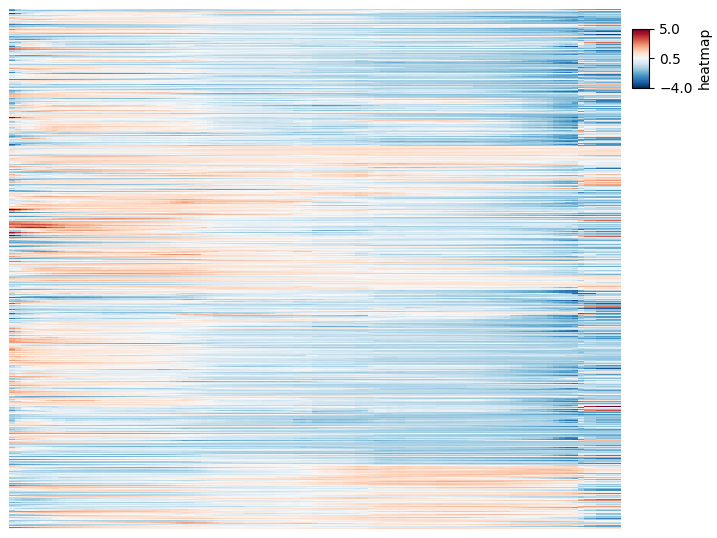

In [448]:
plt.figure(figsize=(8, 6))
cm1=PyComplexHeatmap.ClusterMapPlotter(scale_cpm_bind.iloc[:,0:99],row_cluster=False,col_cluster=False,
                                       col_split_gap=8,
                                   show_rownames=False,show_colnames=False,linewidths=0,rasterized=False,cmap="RdBu_r",
                                       vmax=5,vmin=-4,row_split=
                                      )

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


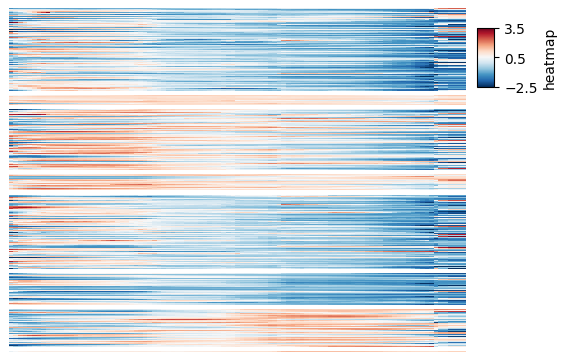

In [458]:
plt.figure(figsize=(6, 4))
cm1=PyComplexHeatmap.ClusterMapPlotter(scale_cpm_bind.iloc[:,0:99],row_cluster=False,col_cluster=False,
                                   show_rownames=False,show_colnames=False,linewidths=0,
                                       rasterized=False,cmap="RdBu_r",vmax=3.5,vmin=-2.5,row_split=labels,row_split_gap=1
                                      )

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


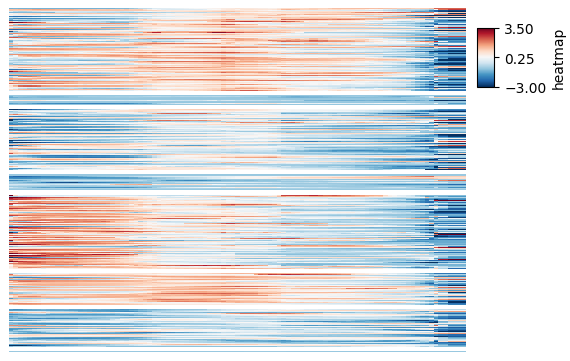

In [459]:
plt.figure(figsize=(6, 4))
cm2=PyComplexHeatmap.ClusterMapPlotter(scale_cpm_bind.iloc[:,99:200],row_cluster=False,col_cluster=False,
                                   show_rownames=False,show_colnames=False,linewidths=0,
                                       rasterized=False,cmap="RdBu_r",vmax=3.5,vmin=-3,row_split=labels,row_split_gap=1
                                      )

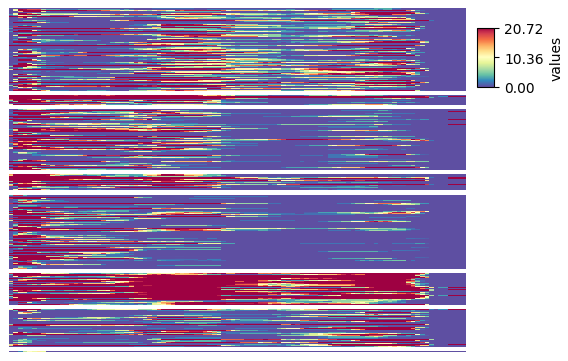

In [471]:
plt.figure(figsize=(6, 4))
cm4=PyComplexHeatmap.ClusterMapPlotter(fdr_matrix.loc[np.concatenate(cm.row_order),:],
                                   col_cluster=False,row_cluster=False,
                                   label='values',
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,cmap="Spectral_r",
                                       row_split=labels,row_split_gap=1)

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
1110038B12Rik,2.072327e+01,2.072327e+01,2.072327e+01,2.072327e+01,2.072327e+01,2.072327e+01,2.072327e+01,2.072327e+01,2.072327e+01,2.072311e+01,...,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09
1200007C13Rik,-1.000000e-09,4.082026e+00,1.347192e+01,2.072319e+01,2.059927e+01,1.669705e+01,1.102127e+01,1.094616e+01,8.282228e+00,5.780957e+00,...,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09
1500015A07Rik,-1.000000e-09,1.368990e+01,2.072327e+01,2.072327e+01,2.072327e+01,2.072327e+01,2.072327e+01,1.372748e+01,5.820313e+00,3.510517e+00,...,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09
1500015O10Rik,-1.000000e-09,-1.000000e-09,6.172890e+00,6.200793e+00,3.908081e+00,1.866693e+00,2.190032e-01,-1.000000e-09,-1.000000e-09,-1.000000e-09,...,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09
1600015I10Rik,-1.000000e-09,2.072304e+01,2.072327e+01,2.072327e+01,2.072327e+01,1.108849e+01,3.734225e+00,1.671093e+00,1.597395e+00,1.538072e+00,...,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zfp995,-1.000000e-09,4.942876e+00,1.696033e+01,1.242297e+01,7.905507e+00,1.285150e+00,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,...,5.009690e+00,6.102749e-01,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09
Zic3,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,2.787242e-01,2.190032e-01,1.114823e-01,3.307634e-02,-1.000000e-09,...,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09
Zkscan6,-1.000000e-09,1.677957e+00,3.916756e+00,1.967227e+00,3.314974e-01,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,...,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09
Zswim9,-1.000000e-09,-1.000000e-09,1.242310e+01,2.072189e+01,1.351458e+01,2.192653e+00,2.257279e+00,-1.000000e-09,-1.000000e-09,-1.000000e-09,...,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09,-1.000000e-09


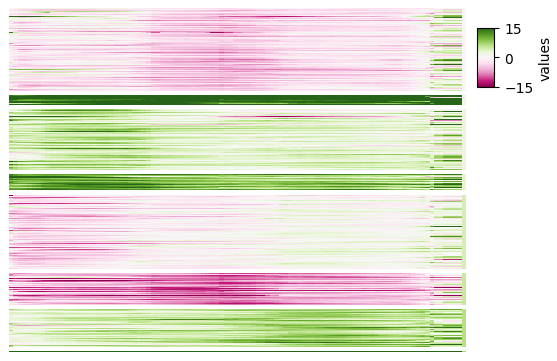

In [469]:
plt.figure(figsize=(6, 4))
cm3=PyComplexHeatmap.ClusterMapPlotter(exprMatrix.loc[np.concatenate(cm.row_order),:],
                                   col_cluster=False,row_cluster=False,
                                   label='values',
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,cmap="PiYG",
                                       row_split=labels,row_split_gap=1,vmax=15,vmin=-15)

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


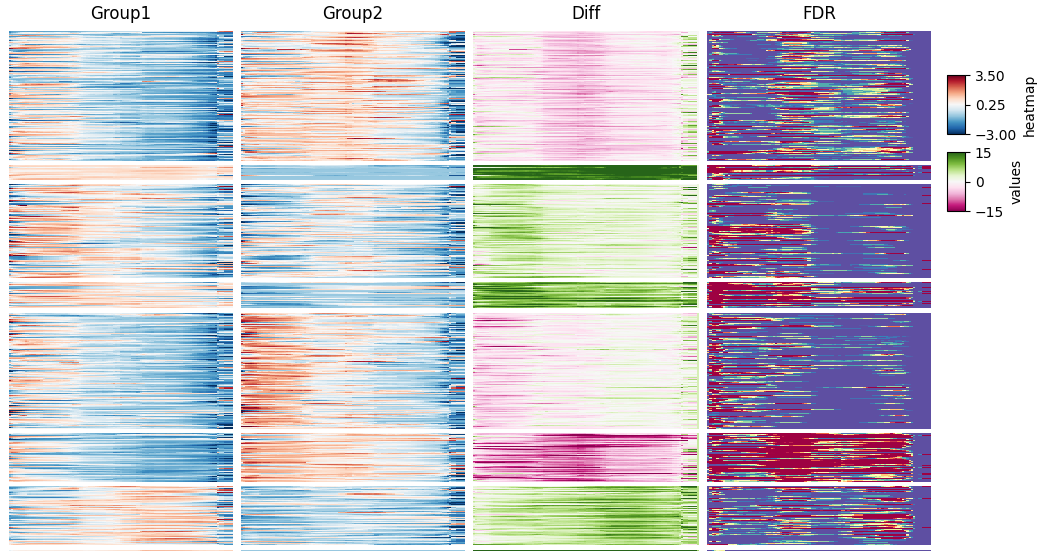

In [472]:
cmlist=[cm1,cm2,cm3,cm4]
plt.figure(figsize=(12,6))
ax=PyComplexHeatmap.clustermap.composite(cmlist=cmlist, main=1,legend_hpad=4,col_gap=0.1)
cm1.ax.set_title("Group1")
cm2.ax.set_title("Group2")
cm3.ax.set_title("Diff")
cm4.ax.set_title("FDR")
plt.savefig("../result/12.5_lepr_dev_steady/diff_gene_exp.pdf")
plt.show()

In [474]:
exprMatrix.loc[np.concatenate(cm.row_order),:].to_csv("../processed_data/12.6_leprDev_vs_Steady/exprMatrix.csv")

In [475]:
fdr_matrix.loc[np.concatenate(cm.row_order),:].to_csv("../processed_data/12.6_leprDev_vs_Steady/fdrMatrix.csv")
scale_cpm_bind.to_csv("../processed_data/12.6_leprDev_vs_Steady/cpmMatrix.csv")

In [324]:
np.concatenate(cm.row_order)

array(['Mlph', 'Ccdc42', 'Prdm6', ..., 'Cmss1', 'Gas5', 'Gm19951'],
      dtype='<U16')

In [310]:
cm.row_order

[['Mlph',
  'Ccdc42',
  'Prdm6',
  'Dnah7a',
  'Fam71a',
  'Lsmem1',
  'Alx4',
  'Fam129a',
  'Kirrel',
  'Hist2h2ac',
  'Amotl2',
  'Arrdc4',
  'Hp',
  'Gm14005',
  'Tgtp2',
  'Lonrf3',
  'Gm32856',
  'Cldn11',
  'Nlrc5',
  'Gm19935',
  'Nectin1',
  'Carmn',
  'Gm5608',
  'Kcnb1',
  'D10Wsu102e',
  'Gsdme',
  'Gm7292',
  'Rasgrp2',
  'Tpm1',
  'En1',
  'Hk1os',
  'Glul',
  'A830035O19Rik',
  'Lrrtm4',
  'Gm16133',
  'Limch1',
  'Rtn4rl1',
  'Igtp',
  'Kyat3',
  'C1rl',
  'Gm26698',
  'Gm45051',
  'Cldn10',
  'Rgs2',
  'Fgfr2',
  'Sept4',
  'Tap1',
  'Psmb8',
  'Tnc',
  'Btg1',
  'Pim3',
  'Casp4',
  'Samhd1',
  'Ndnf',
  'Tap2',
  'Hmox1',
  'Ogn',
  'S1pr1',
  'Agbl3',
  'Dapk1',
  'Igsf10',
  'B430219N15Rik',
  'Gm10457',
  'Lifr',
  'Swap70',
  'Enpp6',
  'Slit2',
  'D830025C05Rik',
  'Itgb3',
  'Slc29a1',
  'Gimap6',
  'Pdgfrb',
  'Ghr',
  'Cd9',
  'Cryzl2',
  'Ccnd1',
  'Isl2',
  'Cenps',
  'Sgo2a',
  'Pclaf',
  'Sgo1',
  'Ackr4',
  'Nol4',
  'Tmem140',
  'Ifi47',
  'Casp12',
  '

In [262]:
pseudobulk=mdata["pseudobulk"]

In [266]:
np.sum(pseudobulk.var<0.01)

overall_gene_p    2083
dtype: int64

In [56]:
design_df = pseudobulk.obs[["Stage","Tissue.Specific."]]

In [62]:
from rpy2.robjects import conversion, numpy2ri, pandas2ri
from rpy2.robjects.packages import STAP, PackageNotInstalledError, importr
stats = importr("stats")
designVal="~Stage+Tissue.Specific.+0"

In [95]:
pseudobulk_bk=pseudobulk.copy()

In [96]:
test=pseudobulk_bk.obs[["Stage","Tissue.Specific."]]

In [103]:
test

,Stage,Tissue.Specific.
Sample,,
Ablation_Matsushita_abl7con1_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Steady,Stroma
Ablation_Matsushita_cxcl1_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Development,DiaphysisandEpiphysis
Ablation_Matsushita_cxcl2_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Steady,DiaphysisandEpiphysis
Bmsc2019_Regev_bm2_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Development,DiaphysisandEpiphysis
Bmsc2019_Regev_bm4_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Steady,Stroma
...,...,...
Metaphysis_Yang_sorted_sep_GTGGTTACAGATAAAC-1_5-1-2,Steady,DiaphysisandEpiphysis
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_GTGGTTACAGATAAAC-1_5-1-2,Development,DiaphysisandEpiphysis
Septoclasts_Kishor_Longbone1_sep_GTGGTTACAGATAAAC-1_5-1-2,Steady,Stroma


In [101]:
test_col=["Stage","Tissue.Specific."]

In [148]:
test_adata=adata[:,0:50]

In [182]:
test_adata=test_adata[test_adata.obs["Stage"]!="Injury(Regeneration)"]

In [183]:
test_adata

View of AnnData object with n_obs × n_vars = 65217 × 50
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2',

In [184]:
mdata_test = milo2.load(test_adata)

In [185]:
milo2.make_nhoods(mdata_test['rna'], prop=0.01)
mdata = milo2.count_nhoods(mdata_test['rna'], sample_col="Sample")
pseudobulk=milo2.make_pseudobulk_parallel(mdata=mdata_test,sample_col="Sample",group_col="Stage",time_col="light_pred",other_col=["Tissue.Specific."],njob=25,min_cell=2)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)




  0%|          | 0/604 [00:00<?, ?it/s]



  4%|▍         | 25/604 [00:29<11:16,  1.17s/it]



  8%|▊         | 50/604 [00:34<05:29,  1.68it/s]



 12%|█▏        | 75/604 [00:37<03:28,  2.54it/s]



 17%|█▋        | 100/604 [00:42<02:39,  3.17it/s]



 21%|██        | 125/604 [00:48<02:19,  3.43it/s]



 25%|██▍       | 150/604 [00:55<02:08,  3.55it/s]



 29%|██▉       | 175/604 [01:01<01:54,  3.75it/s]



 33%|███▎      | 200/604 [01:07<01:44,  3.86it/s]



 37%|███▋      | 225/604 [01:15<01:43,  3.67it/s]



 41%|████▏     | 250/604 [01:20<01:31,  3.86it/s]



 46%|████▌     | 275/604 [01:27<01:27,  3.77it/s]



 50%|████▉     | 300/604 [01:33<01:16,  3.97it/s]



 54%|█████▍    | 325/604 [01:39<01:09,  3.99it/s]



 54%|█████▍    | 326/604 [01:39<01:0

In [186]:

array_of_strings =  np.array([str(s).replace(' ', '') for s in pseudobulk.obs["Tissue.Specific."].values])
pseudobulk.obs["Tissue.Specific."]=array_of_strings
pseudobulk.obs["Tissue.Specific."][pseudobulk.obs["Tissue.Specific."]=="Diaphysis"]="DiaphysisandEpiphysis"
pseudobulk.obs["Tissue.Specific."][pseudobulk.obs["Tissue.Specific."]=="LimbBud"]="DiaphysisandEpiphysis"
pseudobulk.obs["Tissue.Specific."][pseudobulk.obs["Tissue.Specific."]=="Diaphysis"]="DiaphysisandEpiphysis"
pseudobulk.obs["Tissue.Specific."][pseudobulk.obs["Tissue.Specific."]=="Bone"]="Diaphysis"
pseudobulk.obs["Tissue.Specific."][pseudobulk.obs["Tissue.Specific."]=="Metaphysis"]="Diaphysis"


/tmp/ipykernel_225436/566718136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudobulk.obs["Tissue.Specific."][pseudobulk.obs["Tissue.Specific."]=="Diaphysis"]="DiaphysisandEpiphysis"
/tmp/ipykernel_225436/566718136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudobulk.obs["Tissue.Specific."][pseudobulk.obs["Tissue.Specific."]=="LimbBud"]="DiaphysisandEpiphysis"
/tmp/ipykernel_225436/566718136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [205]:
pseudobulk.obs["Tissue.Specific."]

Sample
Ablation_Matsushita_abl7con1_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2    DiaphysisandEpiphysis
Ablation_Matsushita_abl7con2_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2    DiaphysisandEpiphysis
Ablation_Matsushita_cxcl1_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2       DiaphysisandEpiphysis
Ablation_Matsushita_cxcl2_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2       DiaphysisandEpiphysis
BmscChondro_Long_sep_Ablation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2                               Stroma
                                                                                                  ...          
Metaphysis_Yang_sorted_sep_TTTATGCGTCATATGC-1_5-1-2                                                   Diaphysis
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_TTTATGCGTCATATGC-1_5-1-2               DiaphysisandEpiphysis
Septoclasts_Kishor_Longbone1_sep_TTTATGCGTCATATGC-1_5-1-2                                        

In [206]:
pseudo=mdata_test["pseudobulk"]

In [211]:
pseudo.obs["Tissue.Specific."][pseudo.obs["Tissue.Specific."]=="Diaphysis"]="DiaphysisandEpiphysis"

/tmp/ipykernel_225436/321020509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo.obs["Tissue.Specific."][pseudo.obs["Tissue.Specific."]=="Diaphysis"]="DiaphysisandEpiphysis"


In [212]:
set(pseudo.obs["Tissue.Specific."])

{'DiaphysisandEpiphysis', 'Stroma'}

In [255]:
deg3=milo2.da_expression(mdata_test,design="~Stage+Tissue.Specific.",model_contrasts="StageDevelopment-StageSteady",njob=1,fix_libsize=False)

Using edgeR to find DEG......



  0%|          | 0/604 [00:00<?, ?it/s]

the first i 0

indexAblation_Matsushita_abl7con1_ACTGATGCAATCTGCA-1_2-0-2and i0



  0%|          | 1/604 [00:06<1:08:21,  6.80s/it]

the first i 1

indexAblation_Matsushita_abl7con1_CACTCCAGTCGCATAT-1_2-0-2and i1



  0%|          | 2/604 [00:13<1:05:41,  6.55s/it]

the first i 2

indexAblation_Matsushita_abl7con1_CCACGGATCTCAAACG-1_2-0-2and i2



  0%|          | 3/604 [00:19<1:02:23,  6.23s/it]

the first i 3

indexAblation_Matsushita_abl7con1_CTAGCCTCACCCTATC-1_2-0-2and i3



  1%|          | 4/604 [00:25<1:02:12,  6.22s/it]

the first i 4

indexAblation_Matsushita_abl7con1_CTGTTTAAGTGTTAGA-1_2-0-2and i4



  1%|          | 5/604 [00:31<1:01:51,  6.20s/it]

the first i 5

KeyboardInterrupt: 

In [177]:
mdata_test["pseudobulk"].obs

,Sample,Stage,light_pred,Tissue.Specific.,nhoods_index
Sample,,,,,
Ablation_Matsushita_abl7con1_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Ablation_Matsushita_abl7con1,Steady,0.071100,DiaphysisandEpiphysis,Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1...
Ablation_Matsushita_abl14_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Ablation_Matsushita_abl14,Injury.Regeneration.,0.222849,DiaphysisandEpiphysis,Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1...
Ablation_Matsushita_cxcl1_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Ablation_Matsushita_cxcl1,Development,0.326073,DiaphysisandEpiphysis,Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1...
Ablation_Matsushita_cxcl2_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Ablation_Matsushita_cxcl2,Development,0.377558,DiaphysisandEpiphysis,Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1...
Ablation_Matsushita_treat1_sep_Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1-0-2,Ablation_Matsushita_treat1,Injury.Regeneration.,0.277765,DiaphysisandEpiphysis,Ablation_Matsushita_abl14_AGTGGGAGTCTGCCAG-1_1...
...,...,...,...,...,...
Metaphysis_Yang_4_sep_GGTAGAGGTCTGTGGC-1_5-1-2,Metaphysis_Yang_4,Development,0.854634,Diaphysis,GGTAGAGGTCTGTGGC-1_5-1-2
Metaphysis_Yang_sorted_sep_GGTAGAGGTCTGTGGC-1_5-1-2,Metaphysis_Yang_sorted,Development,0.897664,Diaphysis,GGTAGAGGTCTGTGGC-1_5-1-2
Septoclasts_Kishor_Longbone1_sep_GGTAGAGGTCTGTGGC-1_5-1-2,Septoclasts_Kishor_Longbone1,Development,0.903156,Diaphysis,GGTAGAGGTCTGTGGC-1_5-1-2


In [143]:
deg=milo2.da_expression(mdata,design="~Stage",model_contrasts="StageDevelopment-StageSteady",njob=35,fix_libsize=False)

Using edgeR to find DEG......

Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LI

In [868]:
mdata_milo2 = milo2.load(adata)

In [874]:
mdata_milo2.mod["milo"]=milo2
mdata_milo2.mod["pseudobulk"]=pseudobulk

In [876]:
mdata_milo2.write_h5mu("../processed_data/12.6_leprDev_vs_Steady/mudata.h5ad")

AttributeError: 'Milo2' object has no attribute 'strings_to_categoricals'

In [897]:
metaTable=pseudobulk.obs[["Stage","Sample"]]
metaTable.index.name="Index"
aggDict={"Stage":"first"}
designDf=metaTable.groupby("Sample").agg(aggDict)
sample_steady=designDf.index[designDf["Stage"]=="Steady"]
sample_dev=designDf.index[designDf["Stage"]=="Development"]

In [1024]:
len(sample_dev)

23

In [908]:
mdataDev=mdata[(mdata.obs["Lineage"]=="Lepr_BMSC") & (mdata.obs["Sample"].isin(sample_dev))]
mdataSteady=mdata[(mdata.obs["Lineage"]=="Lepr_BMSC") & (mdata.obs["Sample"].isin(sample_steady))]

In [978]:
coor1=pd.DataFrame(mdataSteady["coor"].X.T)
coor2=pd.DataFrame(mdataDev["coor"].X.T)
coor1.index=adata.var.index
coor2.index=adata.var.index
coor1.columns=mdataSteady.obs["Sample"]
coor2.columns=mdataDev.obs["Sample"]
coorDf=pd.concat([coor1,coor2],axis=1)
scale_coorDf = scale(coorDf, axis=1)
scale_coorDf=pd.DataFrame(scale_coorDf)
scale_coorDf.index=coorDf.index
scale_coorDf.columns=coorDf.columns


In [995]:
columnIndex=["Development"]*coor1.shape[1]+["Steady"]*coor2.shape[1]
columnIndex=pd.DataFrame(columnIndex)
columnIndex.index=scale_coorDf.columns

In [2]:
plt.figure(figsize=(4, 4))
cm_coor=PyComplexHeatmap.ClusterMapPlotter(scale_coorDf.loc[np.concatenate(cm.row_order),:],
                                   col_cluster=True,row_cluster=False,
                                   label='values',
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,
                                           legend_gap=5,cmap="RdBu_r",
                                       row_split=labels,col_split=columnIndex,col_split_gap=1,
                                           row_split_gap=1,vmax=3,vmin=-3)

NameError: name 'plt' is not defined

In [1010]:
def mudataDiffProcess(mudata1,mudata2,modal,toScale=True):
    muVal1=pd.DataFrame(mudata1[modal].X.T)
    muVal2=pd.DataFrame(mudata2[modal].X.T)
    muVal1.index=adata.var.index
    muVal2.index=adata.var.index
    muVal1.columns=mudata1.obs["Sample"]
    muVal2.columns=mudata2.obs["Sample"]
    muDf=pd.concat([muVal1,muVal2],axis=1)
    if toScale:
        scale_mu = scale(muDf, axis=1)
        scale_mu=pd.DataFrame(scale_mu)
        scale_mu.index=muDf.index
        scale_mu.columns=muDf.columns
    else:
        scale_mu=muDf
    columnIndex=["group1"]*muVal1.shape[1]+["group2"]*muVal2.shape[1]
    columnIndex=pd.DataFrame(columnIndex)
    columnIndex.index=scale_mu.columns
    return(scale_mu,columnIndex)

In [1017]:
mdataDev

View of MuData object with n_obs × n_vars = 22 × 51936
  obs:	'Organ', 'Stage', 'Age', 'Tissue', 'Tissue.Specific.', 'Gene.type', 'Treatment', 'Age.In.Detail.', 'Machine', 'Origin', 'Sample', 'Lineage'
  3 modalities
    coor:	22 x 17312
    expr:	22 x 17312
    peak:	22 x 17312

In [1012]:
scale_coorDf,columnIndex=mudataDiffProcess(mdataDev,mdataSteady,"coor")
scale_exprDf,columnIndex=mudataDiffProcess(mdataDev,mdataSteady,"expr")
scale_peakDf,columnIndex=mudataDiffProcess(mdataDev,mdataSteady,"peak",toScale=False)


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numer

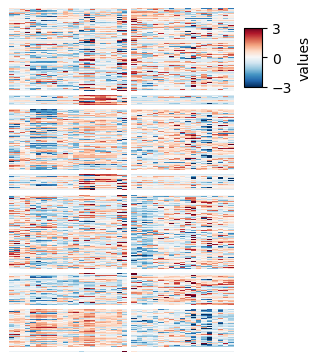

In [998]:
plt.figure(figsize=(3, 4))
cm_coor=PyComplexHeatmap.ClusterMapPlotter(scale_coorDf.loc[np.concatenate(cm.row_order),:],
                                   col_cluster=True,row_cluster=False,
                                   label='values',
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,
                                           legend_gap=5,cmap="RdBu_r",
                                       row_split=labels,col_split=columnIndex,col_split_gap=1,
                                           row_split_gap=1,vmax=3,vmin=-3)

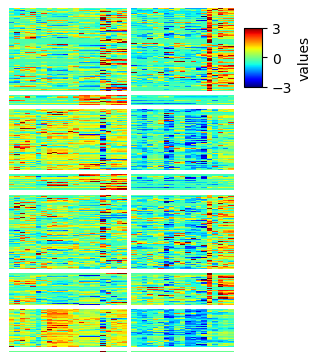

In [1031]:
plt.figure(figsize=(3, 4))
cm_expr=PyComplexHeatmap.ClusterMapPlotter(scale_exprDf.loc[np.concatenate(cm.row_order),:],
                                   col_cluster=True,row_cluster=False,
                                   label='values',
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,
                                           legend_gap=5,
                                       row_split=labels,col_split=columnIndex,col_split_gap=1,col_split_order=["group1","group2"],
                                           row_split_gap=1,vmax=3,vmin=-3)

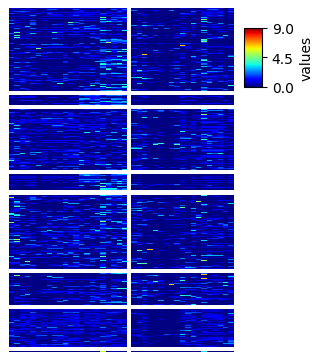

In [1029]:
plt.figure(figsize=(3, 4))
cm_peak=PyComplexHeatmap.ClusterMapPlotter(scale_peakDf.loc[np.concatenate(cm.row_order),:],
                                   col_cluster=True,row_cluster=False,
                                   label='values',
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,
                                           legend_gap=5,
                                       row_split=labels,col_split=columnIndex,col_split_gap=1,col_split_order=["group1","group2"],
                                           row_split_gap=1,vmax=9,vmin=0)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


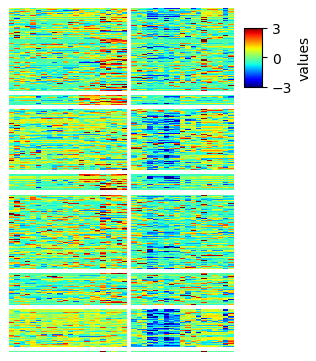

In [1028]:
plt.figure(figsize=(3, 4))
scale_peakDf,columnIndex=mudataDiffProcess(mdataDev,mdataSteady,"peak",toScale=True)
cm_peak2=PyComplexHeatmap.ClusterMapPlotter(scale_peakDf.loc[np.concatenate(cm.row_order),:],
                                   col_cluster=True,row_cluster=False,
                                   label='values',
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,
                                           legend_gap=5,
                                       row_split=labels,col_split=columnIndex,col_split_gap=1,
                                           row_split_gap=1,vmax=3,vmin=-3)

In [1147]:
columnIndex[0].values

array(['group1', 'group1', 'group1', 'group1', 'group1', 'group1',
       'group1', 'group1', 'group1', 'group1', 'group1', 'group1',
       'group1', 'group1', 'group1', 'group1', 'group1', 'group1',
       'group1', 'group1', 'group1', 'group1', 'group2', 'group2',
       'group2', 'group2', 'group2', 'group2', 'group2', 'group2',
       'group2', 'group2', 'group2', 'group2', 'group2', 'group2',
       'group2', 'group2', 'group2', 'group2', 'group2'], dtype=object)

In [1143]:
scale_peakDf.loc[np.concatenate(cm.row_order),:].to_csv("../processed_data/12.6_leprDev_vs_Steady/peak_attr_v0.csv")

In [1144]:
scale_exprDf.loc[np.concatenate(cm.row_order),:].to_csv("../processed_data/12.6_leprDev_vs_Steady/expr_attr_v0.csv")
scale_coorDf.loc[np.concatenate(cm.row_order),:].to_csv("../processed_data/12.6_leprDev_vs_Steady/coor_attr_v0.csv")

In [1040]:
adata.X=dpt[adata.obs_names].X

In [1042]:
dpt.X[0:10,0:10].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6905601 , 0.        , 0.        ],
       [0.        , 0.        , 0.5900465 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5900465 ],
       [0.        , 0.        , 0.5803124 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5803124 , 0.        ],
       [0.        , 0.8996027 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8996027 , 0.        , 0.8996027 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.83329415, 0.        ],
       [0.        , 0.        , 1.0234883 , 0.        , 0.        ,
        0.        , 1.0234883 , 0.        , 0.        , 0.        ],
       [0.        , 0.6308559 , 0.        , 0.        , 0.        ,
        0.6308559 , 0.        , 0.        , 0.6308559 , 0.        ],
       [0.        , 0.7263102 , 0.       

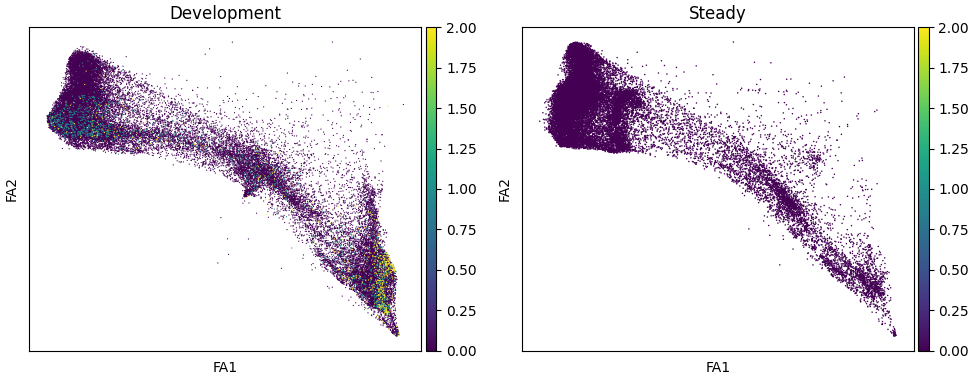

In [1044]:
split_umap(adata,split_by="Stage",color="Maco1",vmax=2)

In [1051]:
pCoorDict={}
for i in coor1.index:
    val1=coor1.loc[i]
    val2=coor2.loc[i]
    _, p_value = mannwhitneyu(val1, val2, alternative='two-sided')
    pCoorDict[i]=p_value
pCoorDf=pd.DataFrame.from_dict(pCoorDict,orient="index")
fdr=pd.DataFrame(sm.stats.multipletests(pCoorDf[0], method='fdr_bh')[1])
fdr.index=pCoorDf.index

In [1087]:
def attrTest(mudata1,mudata2,modal):
    pDict={}
    muVal1=pd.DataFrame(mudata1[modal].X.T)
    muVal2=pd.DataFrame(mudata2[modal].X.T)
    muVal1.index=adata.var.index
    muVal2.index=adata.var.index
    muVal1.columns=mudata1.obs["Sample"]
    muVal2.columns=mudata2.obs["Sample"]
    for i in muVal1.index:
        val1=muVal1.loc[i]
        val2=muVal2.loc[i]
        _, p_value = mannwhitneyu(val1, val2, alternative='two-sided')
        pDict[i]=p_value
    pDf=pd.DataFrame.from_dict(pDict,orient="index")
    fdr=pd.DataFrame(sm.stats.multipletests(pDf[0], method='fdr_bh')[1])
    fdr.index=pCoorDf.index
    return(fdr)

In [1088]:
coorFdr=attrTest(mdataDev,mdataSteady,"coor")

In [1089]:
peakFdr=attrTest(mdataDev,mdataSteady,"peak")
exprFdr=attrTest(mdataDev,mdataSteady,"expr")

In [1090]:
coorFdr

,0
0610007N19Rik,0.144179
0610007P14Rik,0.148501
0610009B22Rik,0.676944
0610009D07Rik,0.517979
0610009E02Rik,0.060890
...,...
mt-Ty,1.000000
tdT-WPRE-trans,1.000000
tdTomato-WPRE-trans,0.346621
tdtomato,0.474339


In [1091]:
peakFdr

,0
0610007N19Rik,0.156823
0610007P14Rik,0.379113
0610009B22Rik,0.129420
0610009D07Rik,0.156823
0610009E02Rik,0.026095
...,...
mt-Ty,1.000000
tdT-WPRE-trans,0.898011
tdTomato-WPRE-trans,0.344587
tdtomato,0.466982


In [1066]:
fdr_subset=fdr.loc[np.concatenate(cm.row_order),:]

<AxesSubplot: ylabel='Count'>

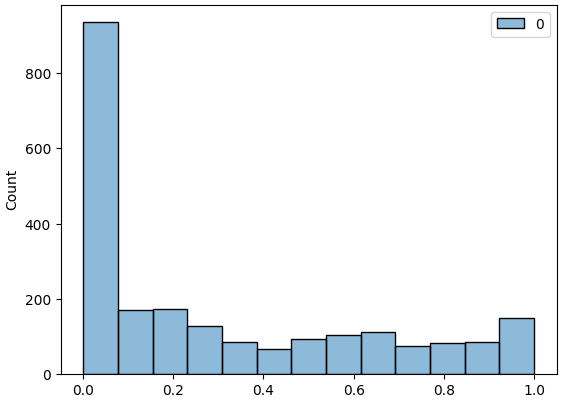

In [1083]:
sns.histplot(fdr_subset)

In [ ]:
result_df = pCoorDf.apply(lambda column: sm.stats.multipletests(column, method='fdr_bh'))

<AxesSubplot: ylabel='Count'>

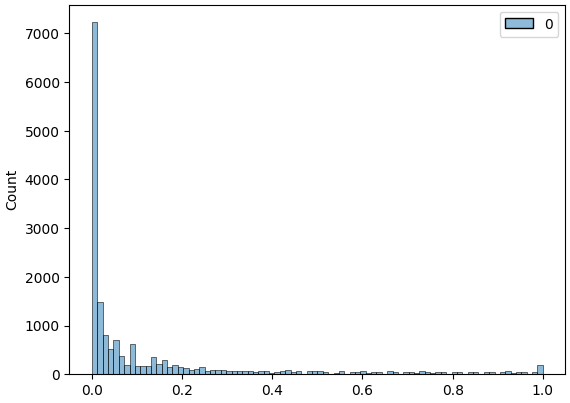

In [1093]:
sns.histplot(exprFdr)

<AxesSubplot: ylabel='Count'>

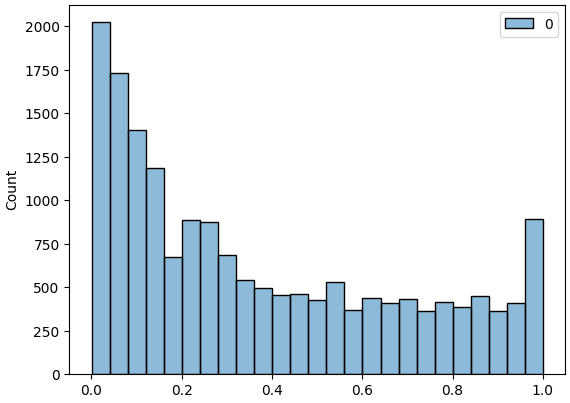

In [1092]:
sns.histplot(peakFdr)

<AxesSubplot: ylabel='Count'>

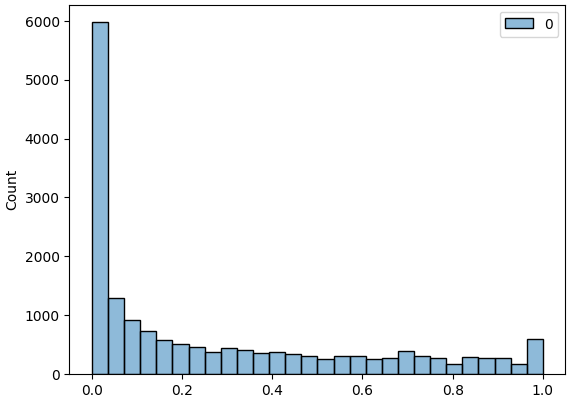

In [1056]:
sns.histplot(pCoorDf)

<AxesSubplot: ylabel='Count'>

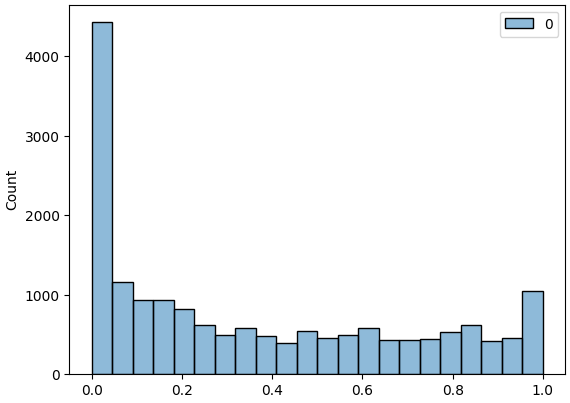

In [1062]:
sns.histplot(fdr)

In [1094]:
coorSub=coorFdr.loc[np.concatenate(cm.row_order),:]
exprSub=exprFdr.loc[np.concatenate(cm.row_order),:]
peakSub=peakFdr.loc[np.concatenate(cm.row_order),:]

In [1123]:
fdrDf=pd.concat([coorSub,exprSub,peakSub],axis=1)

In [1124]:
fdrDf.columns=["Coor","Expr","Peak"]

In [1125]:
fdrDf=-np.log10(fdrDf)

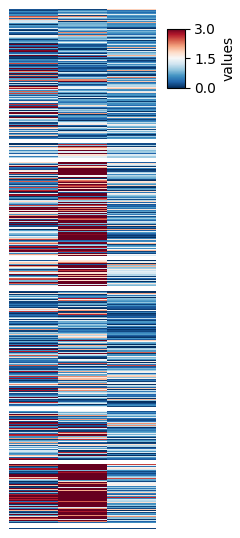

In [1141]:
plt.figure(figsize=(2, 6))
PyComplexHeatmap.ClusterMapPlotter(fdrDf,
                                   col_cluster=False,row_cluster=False,
                                   label='values',cmap="RdBu_r",
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,
                                           legend_gap=5,
                                       row_split=labels,col_split_gap=1,
                                           row_split_gap=1,vmax=3)

In [1130]:
fdrDfBinary=np.where(fdrDf<1.3,0,1)
fdrDfBinary=pd.DataFrame(fdrDfBinary)
fdrDfBinary.index=fdrDf.index
fdrDfBinary.columns=fdrDf.columns

In [1131]:
fdrDfBinary

,Coor,Expr,Peak
Mlph,0,0,0
Ccdc42,0,0,0
Prdm6,0,0,0
Dnah7a,0,0,0
Fam71a,0,0,0
...,...,...,...
Tmtc2,1,1,1
Camk1d,0,1,0
Cmss1,1,1,0
Gas5,1,1,1


In [1132]:
fdrDfBinary

,Coor,Expr,Peak
Mlph,0,0,0
Ccdc42,0,0,0
Prdm6,0,0,0
Dnah7a,0,0,0
Fam71a,0,0,0
...,...,...,...
Tmtc2,1,1,1
Camk1d,0,1,0
Cmss1,1,1,0
Gas5,1,1,1


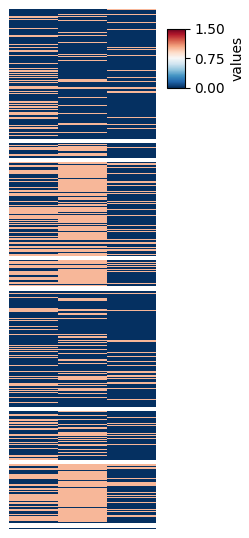

In [1133]:
plt.figure(figsize=(2, 6))
PyComplexHeatmap.ClusterMapPlotter(fdrDfBinary,
                                   col_cluster=False,row_cluster=False,
                                   label='values',cmap="RdBu_r",
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,
                                           legend_gap=5,
                                       row_split=labels,col_split_gap=1,
                                           row_split_gap=1,vmax=1.5)

In [1148]:
fdrDf.to_csv("../processed_data/12.6_leprDev_vs_Steady/fdr_attr.csv")

In [1306]:
fdr_origin<0.05

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0610007N19Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610007P14Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610009B22Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610009D07Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610009E02Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Ty,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tdT-WPRE-trans,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
tdTomato-WPRE-trans,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tdtomato,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1307]:
fdr_origin=pseudobulk.varm["gene_p_adj"]<0.05

In [1319]:
middle_sig=np.sum(fdr_origin.iloc[:,30:70],axis=1)

In [1326]:
middle_sig=fdr_origin.index[middle_sig>0]

In [1331]:
start_sig=np.sum(fdr_origin.iloc[:,0:20],axis=1)
end_sig=np.sum(fdr_origin.iloc[:,80:99],axis=1)
start_end_sig=fdr_origin.index[(start_sig+end_sig)>0]

In [1334]:
middle_diff=set(middle_sig)-set(start_end_sig)

In [1343]:
exprOrigin=pseudobulk.varm["exprPoint"]

In [1344]:
exprOrigin=exprOrigin.fillna(0)

In [1350]:
exprOrigin=exprOrigin.loc[middle_diff,:]

/tmp/ipykernel_225436/1740681628.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  exprOrigin=exprOrigin.loc[middle_diff,:]


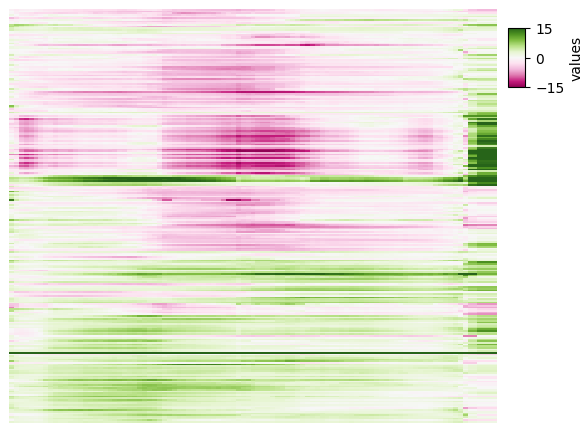

In [1351]:
PyComplexHeatmap.ClusterMapPlotter(exprOrigin,
                                   col_cluster=False,row_cluster=True,
                                   label='values',
                                   show_rownames=False,show_colnames=False,
                                   tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,cmap="PiYG",
                                       row_split_gap=1,vmax=15,vmin=-15)

In [1356]:
intersectDf=pd.DataFrame(np.sum(exprOrigin,axis=1))

In [1357]:
intersectDf.to_csv("../result/12.5_lepr_dev_steady/middle_intersect_genesum.csv")